# Excerpts from SciPy Lectures 2016: Stats and Seaborn

In [1]:
import pandas as pd
from os import path
import sqlalchemy 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import sys
print(sys.version)
sys.executable

2.7.12 |Anaconda 4.1.1 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


'C:\\Users\\jajaco3\\AppData\\Local\\Continuum\\Anaconda2\\python.exe'

Stylesheets defined in Matplotlib: the following command specifies the 'seaborn-poster' style. Others are available.

In [3]:
matplotlib.style.use('seaborn-poster')

# Seaborn: Another Data Visualization Package!
Seaborn has a lot of nice plots that are useful for quickly seeing relationships between variables.  Let's take a look!

## Demo Dataset: Stroop Data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv(path.join('Homework Sample Data', 'Homework 6', 'StroopData.csv'))
df = df[(300 < df['ReactionTime']) & (df['ReactionTime'] < 5000)]
df.head()

,ClassID,UserID,NumTrial,Condition,ColorORWord,WordDisplayed,ColorOfStimulus,ColorOfResponse,ReactionTime,Gender,Age
0,6110,156772,1,ConW,C,YELLOW,Y,Y,1389.0,M,26
1,6110,156772,2,ConW,C,GREEN,G,G,2043.0,M,26
2,6110,156772,3,ConW,C,RED,R,R,1389.0,M,26
3,6110,156772,4,ConW,C,YELLOW,Y,Y,1092.0,M,26
4,6110,156772,5,ConW,C,GREEN,G,G,1310.0,M,26


## Categorical Data: BarPlot, StripPlot, BoxPlot

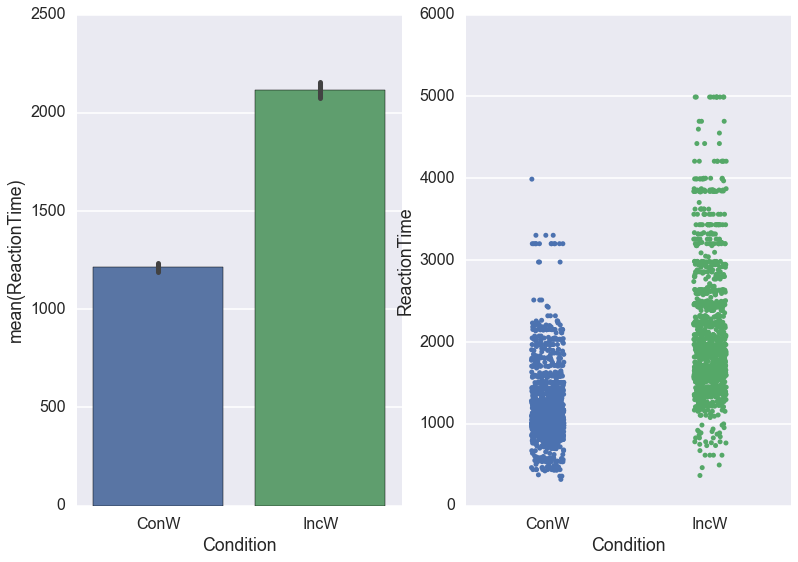

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=1)
sns.barplot(x='Condition', y='ReactionTime', data=df, ax=axes[0])
sns.stripplot(x='Condition', y='ReactionTime', data=df, ax=axes[1],
              jitter=True)

## Pointplot

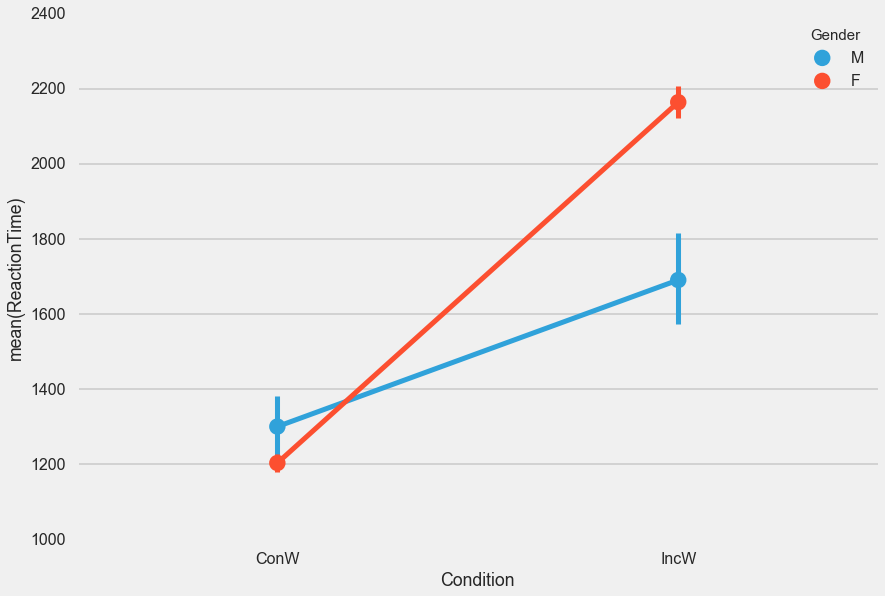

In [61]:
sns.pointplot(x='Condition', y='ReactionTime', hue='Gender', data=df)

## FacetGrid: Map plotting functions across subplots

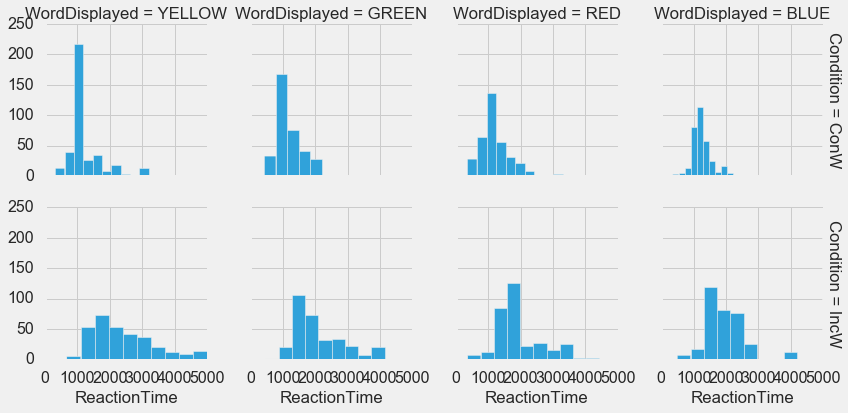

In [39]:
g = sns.FacetGrid(df, row='Condition', col='WordDisplayed', margin_titles=True)
g.map(plt.hist, 'ReactionTime', bins=10)

# FacetGrid Example 2: Mapping plt.scatter to subplots

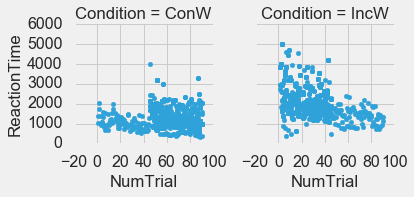

In [40]:
g = sns.FacetGrid(df, col='Condition', margin_titles=True)
g.map(plt.scatter, 'NumTrial', 'ReactionTime')

## FactorPlot: Seaborn Plotting in a FacetGrid

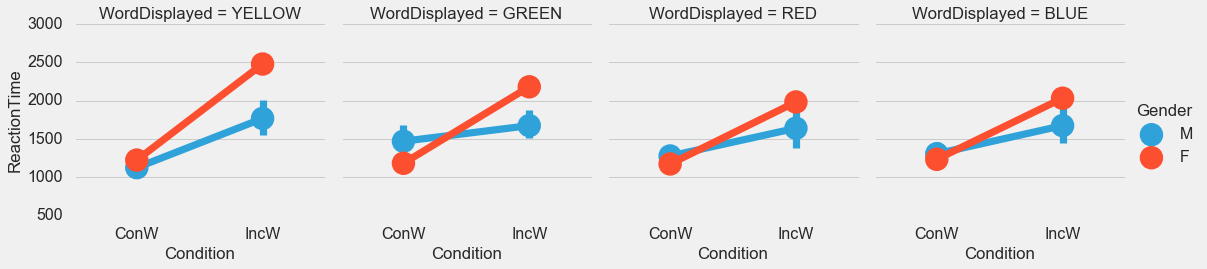

In [41]:
g = sns.factorplot(x='Condition', y='ReactionTime', hue='Gender', 
                   col='WordDisplayed', data=df,
                  )

## LMPlot: Look for Linear Relationships Between Variables

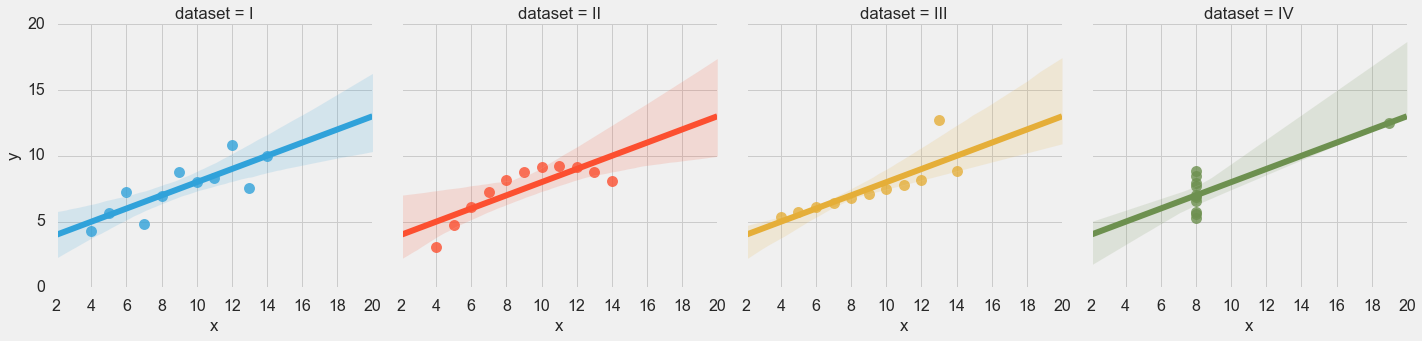

In [42]:
adf = sns.load_dataset("anscombe")
sns.lmplot(data=adf, x="x", y="y", col="dataset", hue="dataset", 
           col_wrap=4, scatter_kws={'s': 120})

## Pandas In-Line Querying and Changing Line Fit Parameters

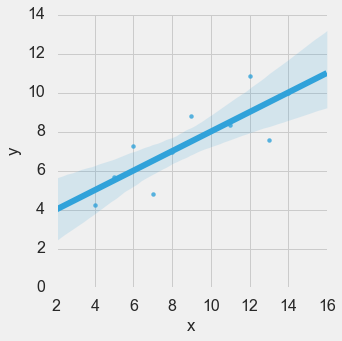

In [43]:
sns.lmplot(x="x", y="y", data=adf.query("dataset == 'I'"),
          ci=95, order=1, robust=False)

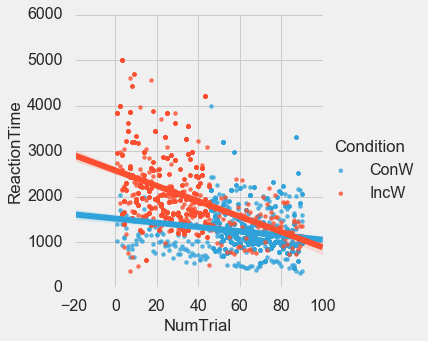

In [44]:
sns.lmplot(x='NumTrial', y='ReactionTime', hue='Condition', data=df)

## JointPlot: Add Statistics Annotations to the Scatter Plot

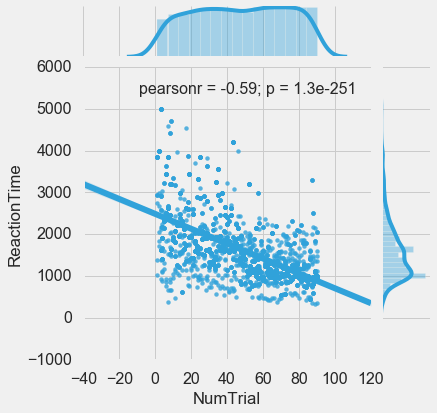

In [45]:
from scipy.stats import pearsonr, spearmanr
sns.jointplot(x='NumTrial', y='ReactionTime', data=df,
              stat_func=pearsonr, kind='reg')  # also try 'hex' and 'kde'

## Seaborn Gallery
Check out the documentation to see all the options!

In [46]:
%%HTML
<iFrame src="http://seaborn.pydata.org/" width=900 height=400></iFrame>

## SQLAlchemy, Pandas, and Seaborn

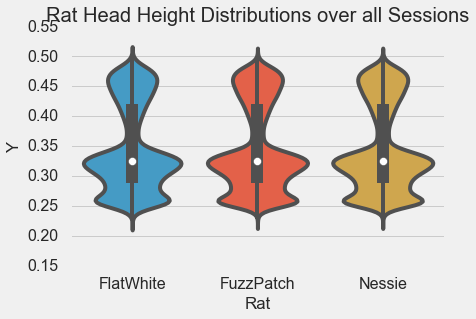

In [47]:
con = sqlalchemy.create_engine('sqlite:///ratdata.db')
data = pd.read_sql_query('SELECT Y, rat FROM behavior, sessions', con)
sns.violinplot(x='Rat', y='Y', data=data)
plt.title('Rat Head Height Distributions over all Sessions')

# Fitting Distributions in Scipy.stats

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E9BE358>], dtype=object)

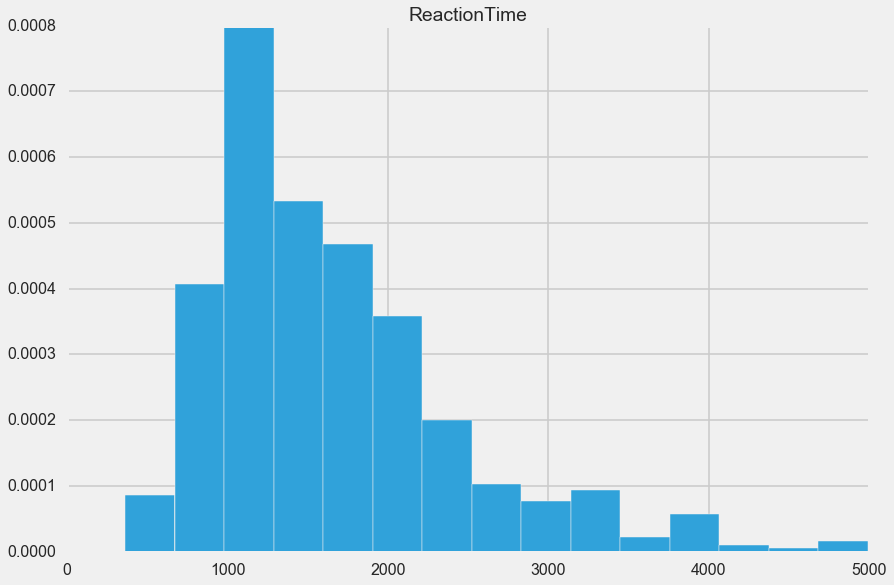

In [90]:
df = pd.read_csv(path.join('Homework Sample Data', 'Homework 6', 'StroopData.csv'))
df = df.query('350 < ReactionTime < 5000')
fig, ax = plt.subplots()
df.hist(column='ReactionTime', bins=15, normed=True, ax=ax)

## Besides Statistical Testing, Scipy.Stats also has Distributions Objects

In [91]:
%%HTML
<iFrame src="http://docs.scipy.org/doc/scipy/reference/stats.html" width=900 height=400></iFrame>

## Fitting a Distribution to Data

In [12]:
from scipy import stats
dist = stats.exponnorm
fitparams = dist.fit(df['ReactionTime'])
fitparams

(3.4350365593687249, 872.3462811148172, 225.93126036428151)

### Producing a Probability Distribution from Fit Parameters

In [15]:
x = np.linspace(500, 5000, 1000)
pdf = dist.pdf(x, *fitparams)

## Plotting Distribution Fit to Data

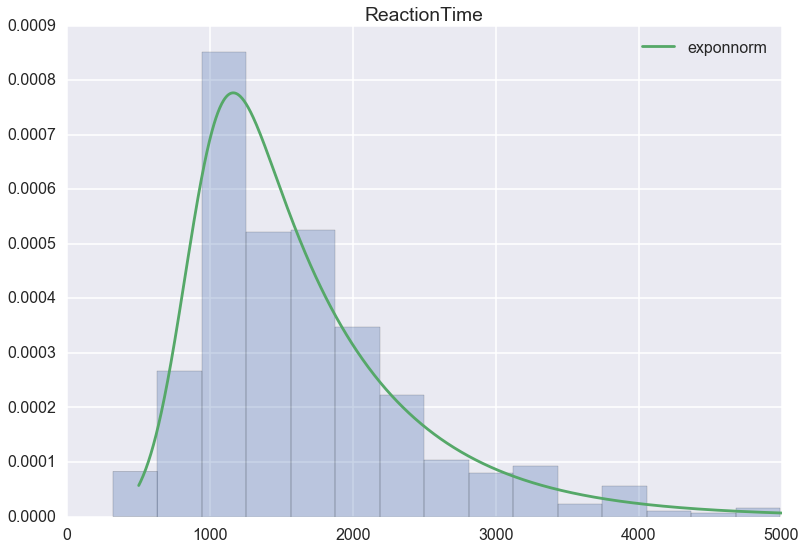

In [16]:
fig, ax = plt.subplots()
df.hist(column='ReactionTime', bins=15, normed=True, ax=ax, alpha=.3)
ax.plot(x, pdf, label=dist.name)
ax.legend()

## The Distribution Objects' Common Interface Makes Batch Plotting Easy!

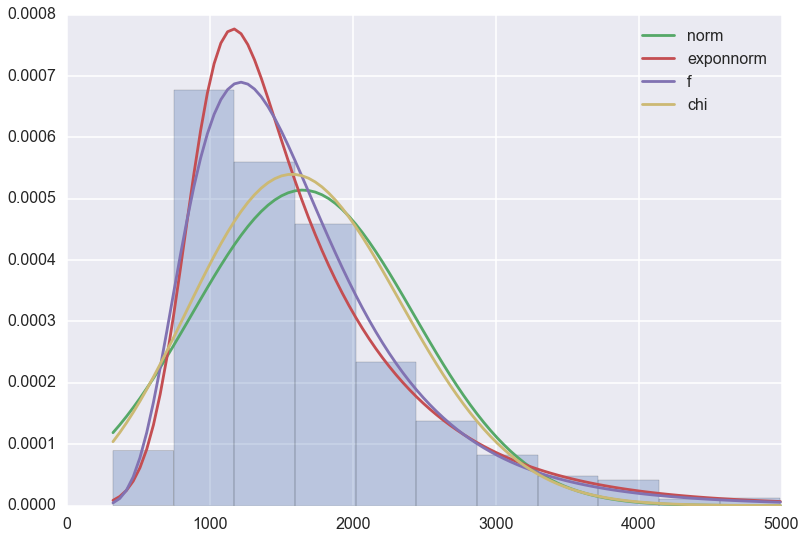

In [17]:
fig, ax = plt.subplots()
reaction_time = df['ReactionTime']
reaction_time.hist(bins=11, normed=True, ax=ax, alpha=.3)
for dist in [stats.norm, stats.exponnorm, stats.f, stats.chi]:
    x = np.linspace(reaction_time.min(), reaction_time.max(), 100)
    ax.plot(x, dist.pdf(x, *dist.fit(reaction_time)), label=dist.name)
    ax.legend()

## Distribution Fitting with Seaborn's distplot() function

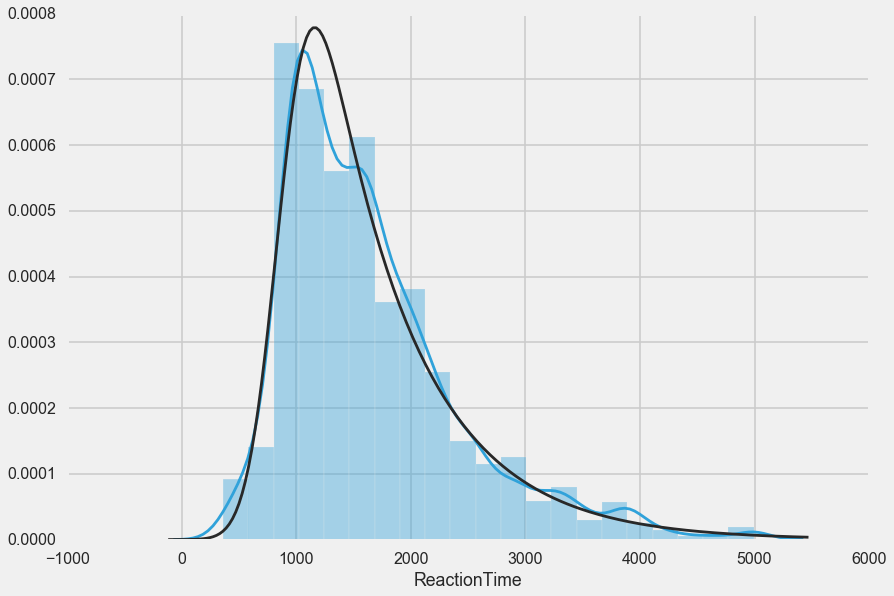

In [98]:
sns.distplot(df['ReactionTime'], bins=21, fit=stats.exponnorm)

# Questions / Discussion